Quantum Anomaly Detection Circuit:
        ┌───┐┌─────────┐           ░ ┌─┐      
   q_0: ┤ H ├┤ Ry(π/4) ├──■────────░─┤M├──────
        ├───┤├─────────┤┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ Ry(π/3) ├┤ X ├──■───░──╫─┤M├───
        ├───┤├─────────┤└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ Ry(π/6) ├─────┤ X ├─░──╫──╫─┤M├
        └───┘└─────────┘     └───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════╩══╩══╩═
                                      0  1  2 
Quantum Anomaly Detection Results: {'011': 37, '111': 12, '100': 8, '001': 198, '110': 32, '000': 2, '010': 115, '101': 596}


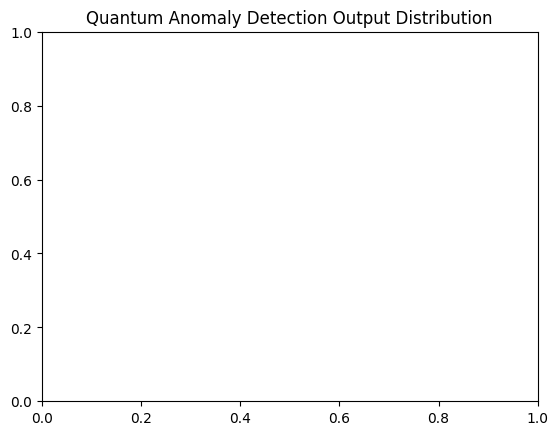

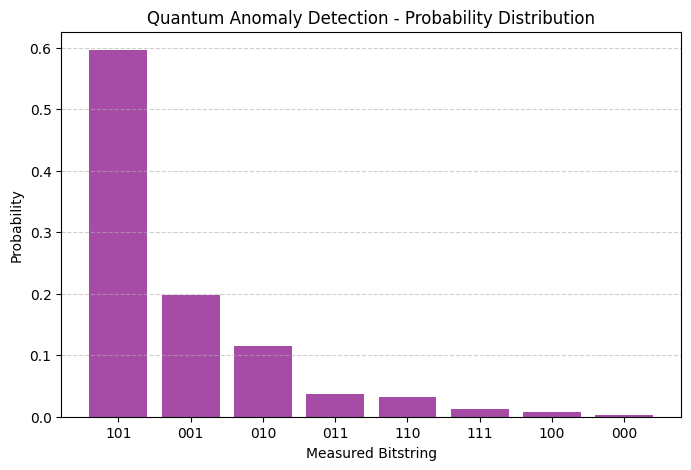

In [1]:
#-------------------------------------------------------------------------
# Quantum Anomaly Detection 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

def quantum_anomaly_filter(theta):
    """ the Quantum Anomaly Detection Circuit """
    qc = QuantumCircuit(3)
    
    # Apply Hadamard gates to create superposition
    qc.h(range(3))  

    # Apply parameterized rotations
    for i in range(3):
        qc.ry(theta[i], i)

    # Introduce entanglement using CNOT gates
    qc.cx(0, 1)
    qc.cx(1, 2)

    # Measure all qubits
    qc.measure_all()
    
    return qc
#-------------------------------------------------------------------------

# Define sample anomaly detection parameters - Example angles
theta_values = [np.pi / 4., np.pi / 3., np.pi / 6.]  

# Create and display the quantum circuit
qc = quantum_anomaly_filter(theta_values)
print("Quantum Anomaly Detection Circuit:")
print(qc)
qc.draw('mpl')

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
result    = execute(qc, simulator, shots=1000).result()
counts    = result.get_counts()



# Convert measurement results into a probability distribution
bitstrings    = list(counts.keys())
probabilities = np.array(list(counts.values())) / 1000.0

# Sort results for visualization
sorted_indices       = np.argsort(probabilities)[::-1]
sorted_bitstrings    = np.array(bitstrings)[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Print and visualize measurement results
print("Quantum Anomaly Detection Results:", counts)
plot_histogram(counts)
plt.title("Quantum Anomaly Detection Output Distribution")
plt.show()

# Plot the anomaly detection probability distribution
plt.figure(figsize=(8, 5))
plt.bar(sorted_bitstrings, sorted_probabilities, color='purple', alpha=0.7)
plt.xlabel("Measured Bitstring")
plt.ylabel("Probability")
plt.title("Quantum Anomaly Detection - Probability Distribution")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()
